<a href="https://colab.research.google.com/github/porchportal/python-learning/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ดาวโหลด Library เพื่อใช้ในการประมวลผลข้อมูล

In [ ]:
!pip install pythainlp[full]
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install nltk
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 127.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 22.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Data Preparation

In [ ]:
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test.txt

--2021-04-18 03:25:15--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5658270 (5.4M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   5.40M  23.8MB/s    in 0.2s    

2021-04-18 03:25:16 (23.8 MB/s) - ‘train.txt’ saved [5658270/5658270]

--2021-04-18 03:25:16--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respons

In [ ]:
import re
import string
import pandas as pd
from pythainlp.corpus.common import thai_stopwords
from pythainlp.tokenize import word_tokenize
from pythainlp.util import normalize


In [ ]:
df_train = pd.read_csv('train.txt','\n',header = None)
df_train_label = pd.read_csv('train_label.txt','\n',header = None )

df_test = pd.read_csv('test.txt','\n',header = None )
df_test_label = pd.read_csv('test_label.txt','\n',header = None )



In [ ]:
df_train['label'] = df_train_label
df_train.columns = ['text','label']
df_train.dropna(inplace=True)

df_test['label'] = df_test_label
df_test.columns = ['text','label']
df_test.dropna(inplace=True)

# ลดขนาด Data
df_train = df_train.iloc[:10000]

del df_train_label
del df_test_label

In [ ]:
def clean_text(txt):


    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)

    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ space
    txt = re.sub(r' ','',txt)

    #ลบ เลข
    txt = re.sub("(\d)", "",txt)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)

    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())

    return txt



df_train.text = df_train.text.apply(clean_text)
df_test.text = df_test.text.apply(clean_text)

In [ ]:
def remove_stw(txt):
  rm_stw_text =[]
  for i in txt:
    if i not in thai_stopwords():
      rm_stw_text.append(i)
  return rm_stw_text

df_train['tokenized'] = df_train.text.apply(word_tokenize)
df_test['tokenized'] = df_test.text.apply(word_tokenize)
df_train['tokenized'] = df_train['tokenized'].apply(remove_stw)
df_test['tokenized'] = df_test['tokenized'].apply(remove_stw)

In [ ]:
print('untokenized', df_train.text[0])
print('tokenized', df_train.tokenized[0])

untokenized ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
tokenized ['ประเทศ', 'ผลิต', 'ส่งออก', 'ยาสูบ', 'โลก', 'จิง', 'ป่าว', 'คับ']


# Exploratory Data Analysis & Text Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud

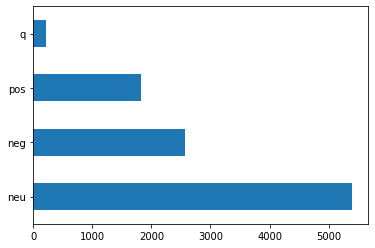

In [ ]:
df_train.label.value_counts().plot.barh()
plt.show()

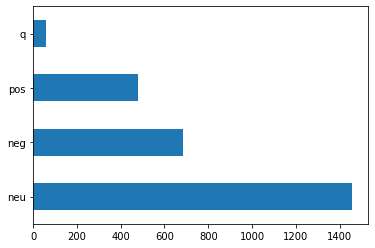

In [ ]:
df_test.label.value_counts().plot.barh()
plt.show()

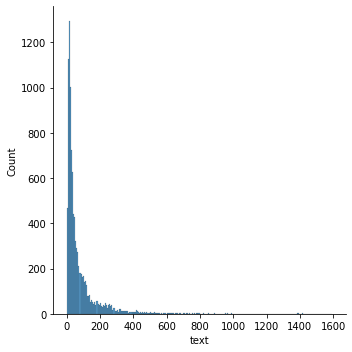

In [ ]:
sns.displot(df_train.text.apply(len))

In [ ]:
df_all_values = df_train[:10000].label.value_counts().to_frame()
df_all_values.columns = ['label_train']
df_all_values['label_test'] = df_test.label.value_counts()
df_all_values['percentage_train'] = df_all_values.label_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.label_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

,label_train,label_test,percentage_train,percentage_test
neu,5393,1456,0.5393,0.544503
neg,2562,683,0.2562,0.255423
pos,1818,478,0.1818,0.178758
q,227,57,0.0227,0.021316


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


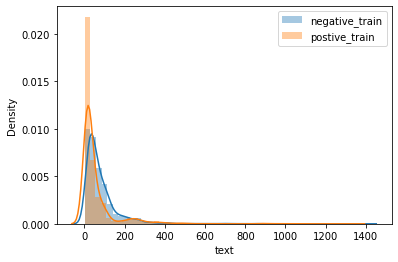

In [ ]:
sns.distplot(df_train.loc[df_train['label'] == 'neg'].text.apply(len), hist=True, label='negative_train')
sns.distplot(df_train.loc[df_train['label'] == 'pos'].text.apply(len), hist=True, label='postive_train')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


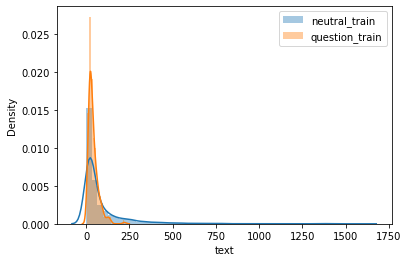

In [ ]:
sns.distplot(df_train.loc[df_train['label'] == 'neu'].text.apply(len), hist=True, label='neutral_train')
sns.distplot(df_train.loc[df_train['label'] == 'q'].text.apply(len), hist=True, label='question_train')
plt.legend()
plt.show()

In [ ]:
!wget https://www.f0nt.com/download/sipafonts/THSarabunNew.zip ; unzip THSarabunNew.zip

--2021-04-18 03:53:46--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2021-04-18 03:53:47--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   398KB/s    in 1.1s    

2021-04-18 03:53:48 (398 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  i

In [ ]:
regexp = r"[ก-๙a-zA-Z']+"
path = 'THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path,
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000,
                      colormap='plasma',
                      scale=3,
                      font_step=4,
                      contour_color='steelblue',
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(tokenized_string)

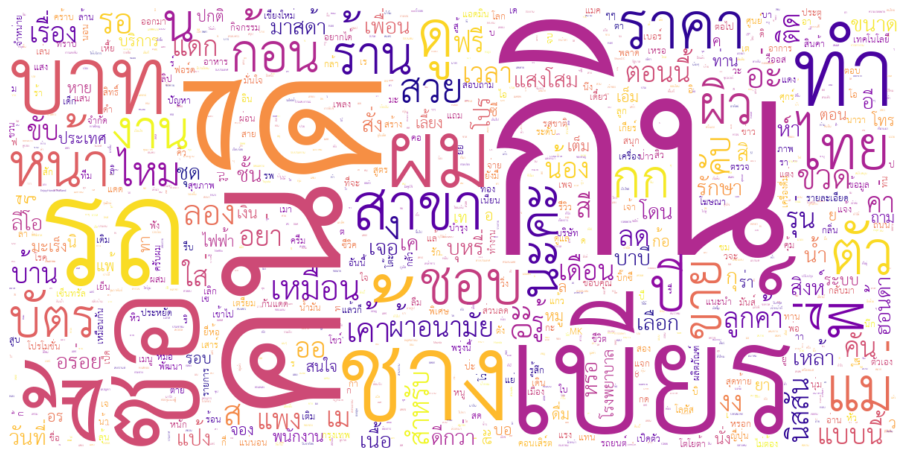

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [ ]:
import collections
neg = df_train.loc[df_train.label=="neg"].tokenized
pos= df_train.loc[df_train.label=="pos"].tokenized
all= df_train.tokenized

count_neg=[]
count_pos=[]
count_all=[]
for i in neg:
    for j in i:
            count_neg.append(j)
for i in pos:
    for j in i:
            count_pos.append(j)
for i in all:
    for j in i:
            count_all.append(j)

counter_pos=collections.Counter(count_neg)
counter_neg=collections.Counter(count_pos)
counter_all=collections.Counter(count_all)


your_list_neg = [list(i) for i in counter_neg.items()]
your_list_pos = [list(i) for i in counter_pos.items()]
your_list= [list(i) for i in counter_all.items()]

count = pd.DataFrame(your_list,columns=['Word','Counts'])
count_neg = pd.DataFrame(your_list_neg,columns=['Word','Counts_positive'])
count_pos = pd.DataFrame(your_list_pos,columns=['Word','Counts_negative'])


result = pd.merge(pd.merge(count,count_neg,on='Word'),count_pos,on='Word')

In [ ]:
result

,Word,Counts,Counts_positive,Counts_negative
0,ประเทศ,119,4,42
1,ผลิต,45,3,10
2,โลก,66,6,14
3,จิง,25,2,6
4,ป่าว,65,8,19
...,...,...,...,...
2389,ต่อไปนี้,3,1,1
2390,ก้อง,3,1,1
2391,เเห้ง,2,1,1
2392,ถถถถ,2,1,1


In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127866 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128512 missing from current font.
  font.

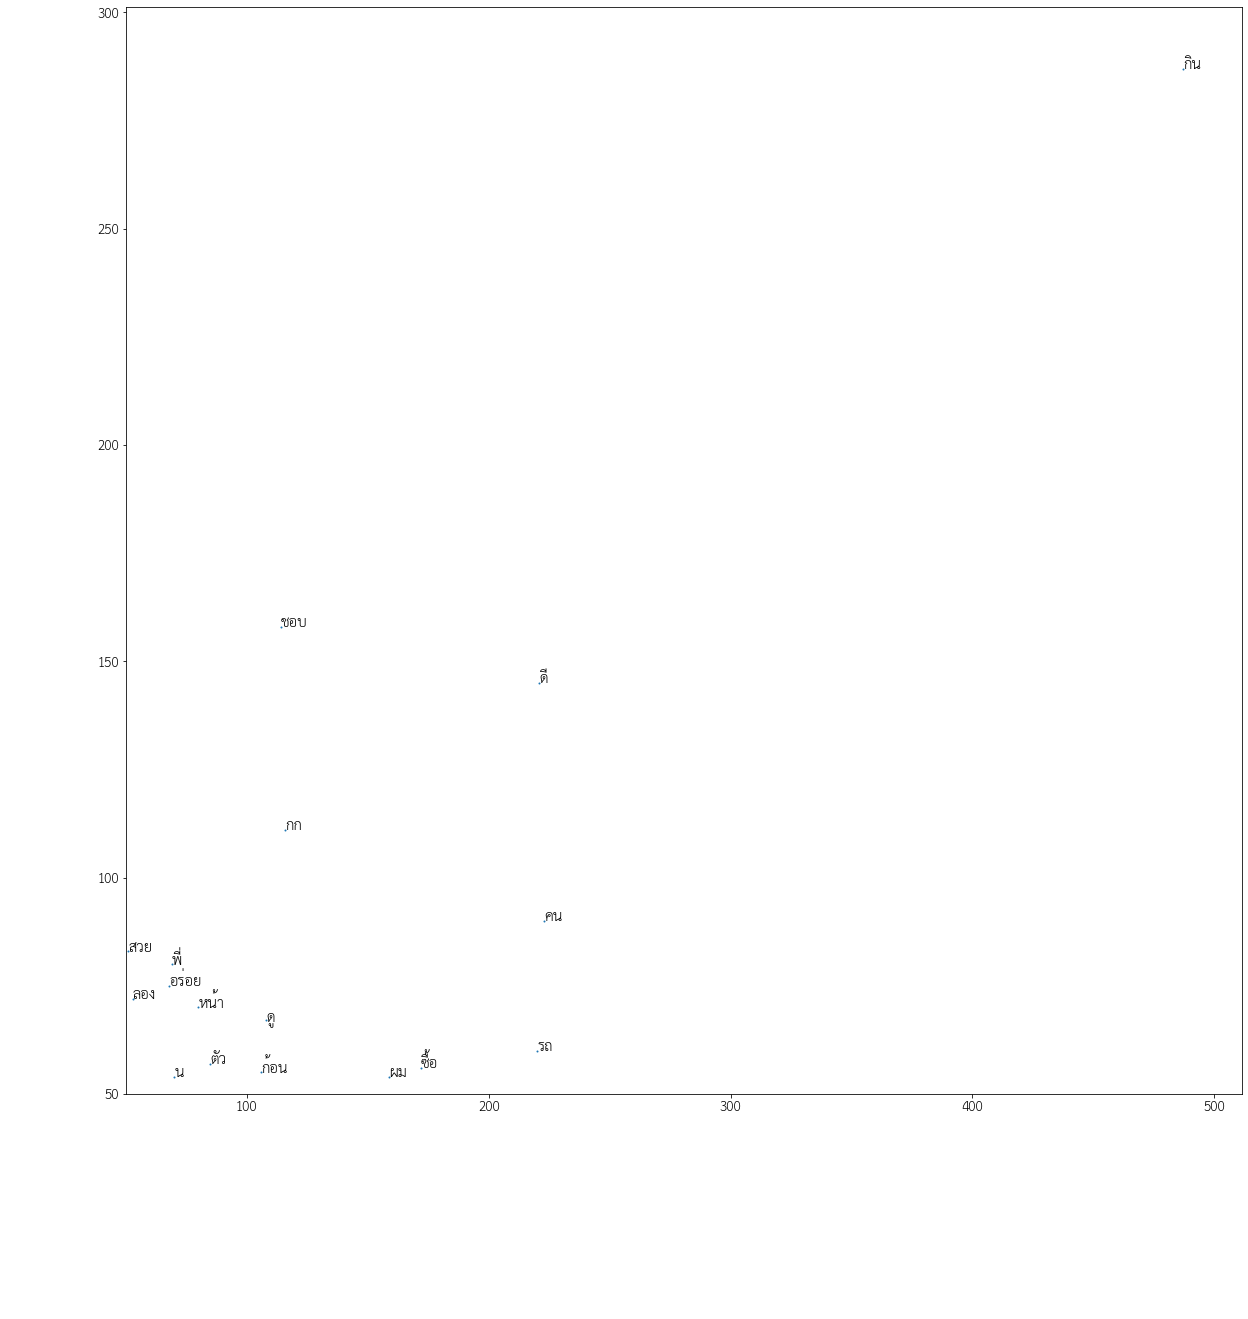

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

import matplotlib.font_manager as fm
from matplotlib import rcParams
x = result.Counts_negative.tolist()
y=result.Counts_positive.tolist()


plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0
plt.figure(figsize=(20, 20))
rcParams.update({'font.size': 22})
plt.scatter(x, y,s=1)
plt.xlim(50,)
plt.ylim(50,)


for i, txt in enumerate(result.Word.tolist()):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('foo.pdf')

# Feature extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'], random_state = 0)

tfidf = TfidfVectorizer(tokenizer = word_tokenize)
tfidf_train_vec = tfidf.fit_transform(X_train).toarray()
tfidf_df = pd.DataFrame(tfidf_train_vec)

tfidf_test_vec = tfidf.transform(X_test).toarray()

print('train data', tfidf_train_vec.shape)
print('test data',tfidf_test_vec.shape)

train data (7500, 14306)
test data (2500, 14306)


In [ ]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,14266,14267,14268,14269,14270,14271,14272,14273,14274,14275,14276,14277,14278,14279,14280,14281,14282,14283,14284,14285,14286,14287,14288,14289,14290,14291,14292,14293,14294,14295,14296,14297,14298,14299,14300,14301,14302,14303,14304,14305
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine learning : Text Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

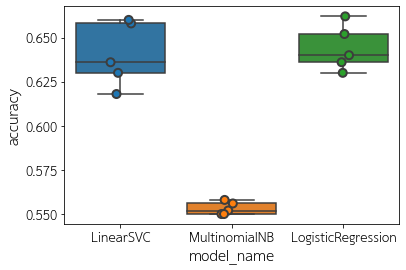

In [ ]:
models = [
    LinearSVC(random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_test_vec, y_test, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [ ]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending = False)

model_name
LogisticRegression    0.6460
LinearSVC             0.6384
MultinomialNB         0.5560
Name: accuracy, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


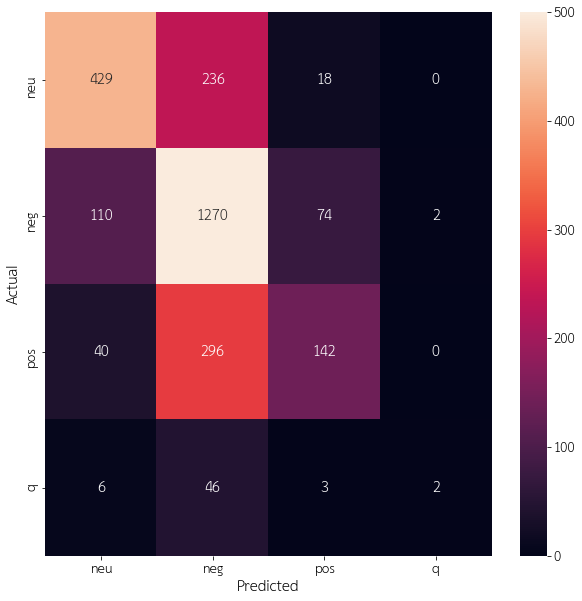

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LogisticRegression(random_state = 0)

model.fit(tfidf.fit_transform(df_train.text), df_train.label)

X_test = tfidf.transform(df_test['text'])

y_pred = model.predict(X_test)
y_test = df_test.label
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
label_name = list(df_train.label.unique())

sns.heatmap(conf_mat, annot=True, fmt='d',vmin=0, vmax=500,xticklabels = label_name, yticklabels =label_name)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(df_test.label, y_pred))


              precision    recall  f1-score   support

         neg       0.73      0.63      0.68       683
         neu       0.69      0.87      0.77      1456
         pos       0.60      0.30      0.40       478
           q       0.50      0.04      0.07        57

    accuracy                           0.69      2674
   macro avg       0.63      0.46      0.48      2674
weighted avg       0.68      0.69      0.66      2674

